In [1]:
import cv2
import depthai as dai
import numpy as np
import os, random
import time
from matplotlib import pyplot as plt

VIDEO_FRAMES_FOLDER = 'video_frames'

In [2]:
def getFrame(queue):
    frame = queue.get()
    return frame.getCvFrame()

def getColorCamera(pipeline):
    colorCamera = pipeline.createColorCamera()
    colorCamera.setResolution(dai.ColorCameraProperties.SensorResolution.THE_1080_P)
    return colorCamera

def create_video_frames_folder(sub_folder_name):
    current_directory = os.getcwd()
    video_frames_directory = os.path.join(current_directory, VIDEO_FRAMES_FOLDER+'/'+sub_folder_name)
    if not os.path.exists(video_frames_directory):
        os.makedirs(video_frames_directory)

create_video_frames_folder('frames')

In [6]:
pipeline = dai.Pipeline()

# Capturing Images from RGB Camera
colorCamera = getColorCamera(pipeline)

# Creating output
xRGBout = pipeline.createXLinkOut()
xRGBout.setStreamName("rgb")
colorCamera.preview.link(xRGBout.input)

with dai.Device(pipeline) as device:
    queue_rgb = device.getOutputQueue(name='rgb', maxSize=4, blocking=False)
    start_time = time.time()
    frame_count = 0
    while time.time() - start_time<10:
        rgbFrame = getFrame(queue_rgb)
        rgbFrameResized = cv2.resize(rgbFrame, (960, 540))
        cv2.imshow('rgb', rgbFrameResized)
        cv2.imwrite(f"{VIDEO_FRAMES_FOLDER}/new_frames/rgb_image_{frame_count+1}.png", rgbFrame)
        frame_count+= 1
    cv2.destroyAllWindows()
    print(f"Using RGB Camera, {frame_count} images captured")

Using RGB Camera, 298 images captured


# Calculating SSD

Image: rgb_image_292.png, SSD Value: 4060.0, Match Location: (186, 105)


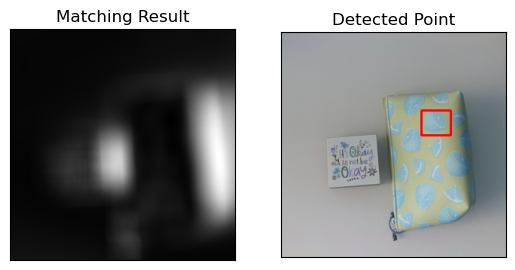

Image: rgb_image_185.png, SSD Value: 8740.0, Match Location: (132, 101)


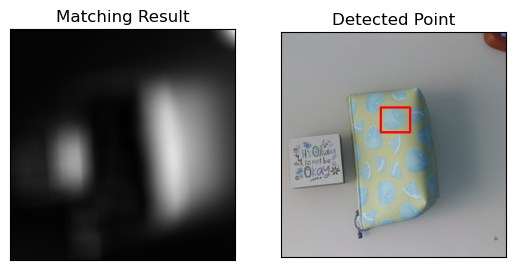

Image: rgb_image_11.png, SSD Value: 51364.0, Match Location: (147, 97)


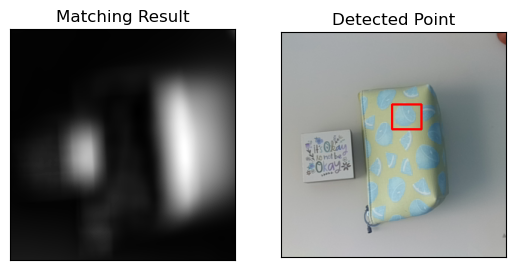

Image: rgb_image_1.png, SSD Value: 1938956.0, Match Location: (210, 135)


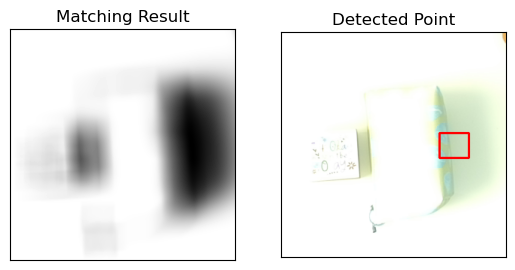

Image: rgb_image_156.png, SSD Value: 14096.0, Match Location: (112, 101)


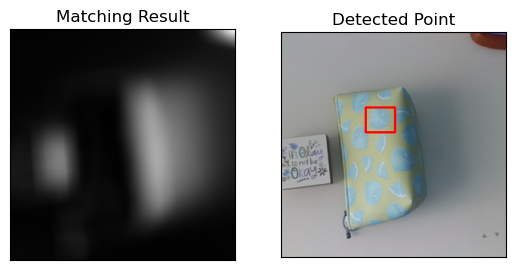

Image: rgb_image_133.png, SSD Value: 16956.0, Match Location: (100, 100)


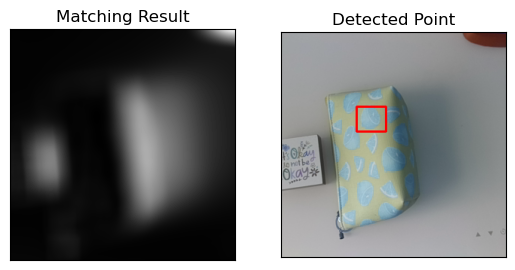

Image: rgb_image_68.png, SSD Value: 14824.0, Match Location: (109, 99)


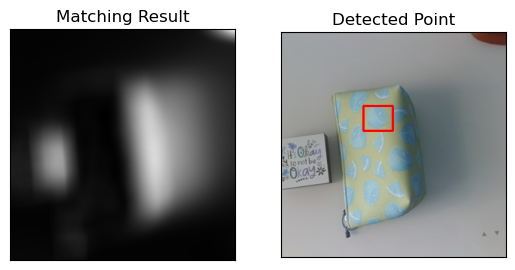

Image: rgb_image_254.png, SSD Value: 3652.0, Match Location: (168, 103)


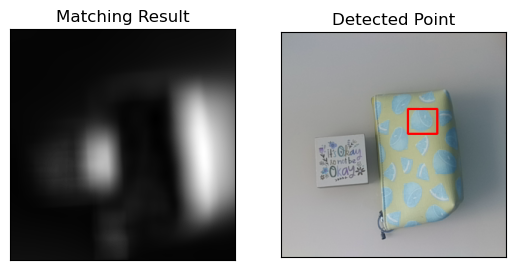

Image: rgb_image_19.png, SSD Value: 8344.0, Match Location: (136, 98)


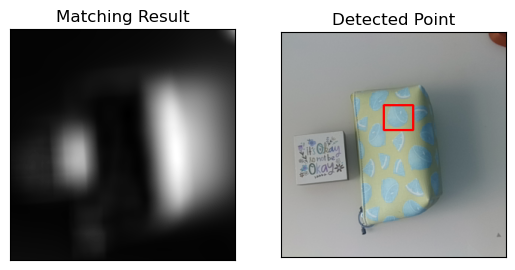

Image: rgb_image_143.png, SSD Value: 14640.0, Match Location: (104, 97)


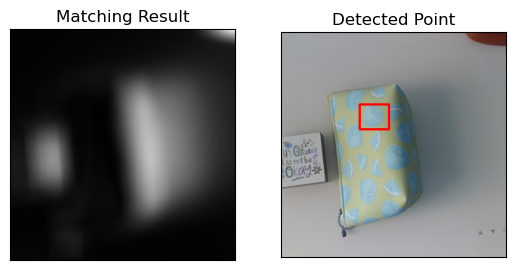

In [3]:
create_video_frames_folder('ssd_results')
def find_matches(image, template):
    res = cv2.matchTemplate(image, template, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Min location gives the top-left corner of the rectangle, where we found the lowest difference
    top_left = min_loc
    return min_val, top_left, res


def main():
    selected_region = cv2.imread("roi.png")
    selected_region = cv2.cvtColor(selected_region, cv2.COLOR_BGR2GRAY)

    frames_dir = os.path.join(VIDEO_FRAMES_FOLDER, 'frames')
    all_frames = os.listdir(frames_dir)
    ssd_results_dir = os.path.join(VIDEO_FRAMES_FOLDER, 'ssd_results')
    # Randomly picking 10 images
    random_images = random.sample(all_frames, 10)

    # Calculating SSD
    for image_name in random_images:
        image_path = os.path.join(frames_dir, image_name)
        image = cv2.imread(image_path)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        ssd_value, top_left, res = find_matches(image_gray, selected_region)
        
        print(f"Image: {image_name}, SSD Value: {ssd_value}, Match Location: {top_left}")
        h, w = selected_region.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        pm = cv2.rectangle(image, top_left, bottom_right, 255, 2)

        cv2.imshow("Pattern Match", pm) 
        cv2.waitKey(1000)
        
        cv2.imwrite(ssd_results_dir+"/out_"+image_name, pm)
        cv2.destroyAllWindows()  
        # Plotting the results
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(image,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
         
        plt.show()

if __name__ == "__main__":
    main()


# Calculating Norm Results

Image: rgb_image_194.png, Normalized Correlation Value: 0.9236053228378296, Match Location: (136, 101)


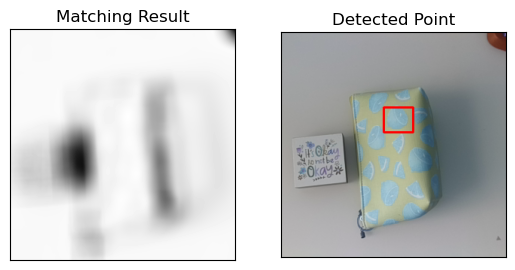

Image: rgb_image_41.png, Normalized Correlation Value: 0.9254187345504761, Match Location: (130, 95)


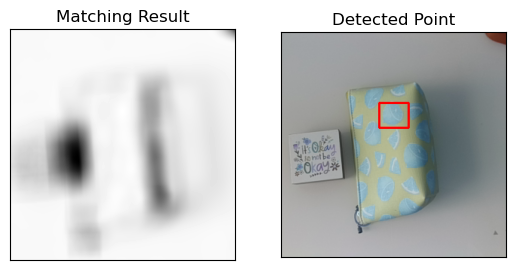

Image: rgb_image_186.png, Normalized Correlation Value: 0.9103917479515076, Match Location: (132, 101)


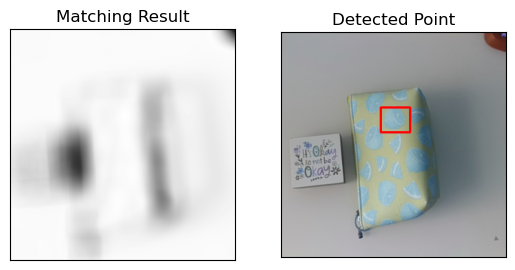

Image: rgb_image_92.png, Normalized Correlation Value: 0.8936542868614197, Match Location: (88, 100)


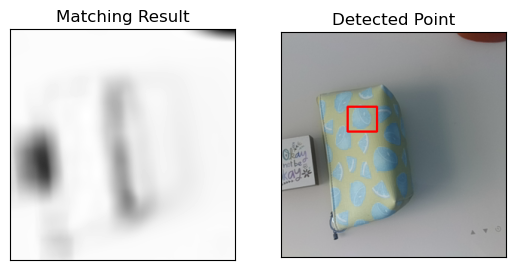

Image: rgb_image_222.png, Normalized Correlation Value: 0.9322377443313599, Match Location: (151, 102)


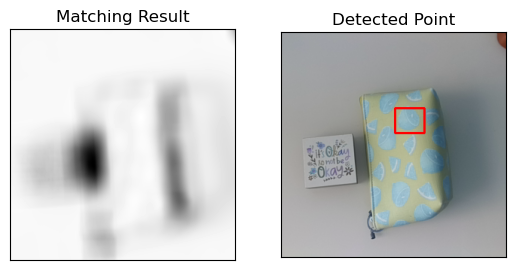

Image: rgb_image_176.png, Normalized Correlation Value: 0.8935845494270325, Match Location: (124, 100)


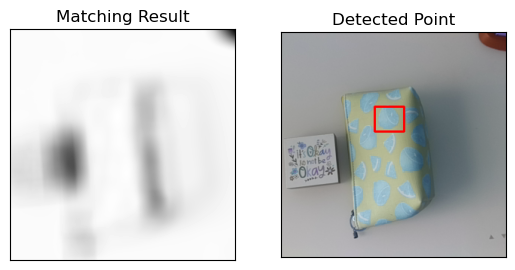

Image: rgb_image_131.png, Normalized Correlation Value: 0.8629604578018188, Match Location: (99, 100)


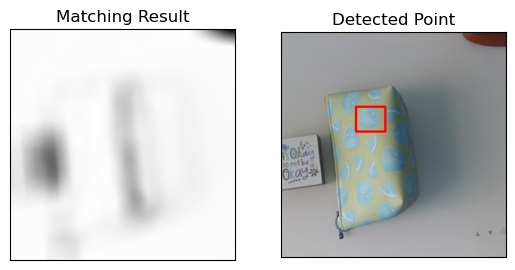

Image: rgb_image_216.png, Normalized Correlation Value: 0.9319427013397217, Match Location: (149, 103)


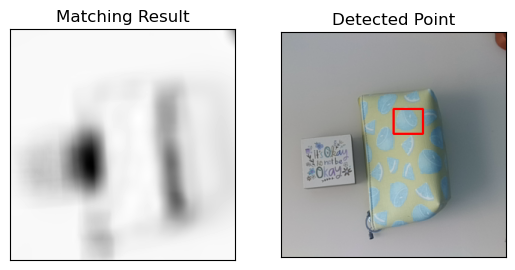

Image: rgb_image_69.png, Normalized Correlation Value: 0.8883325457572937, Match Location: (108, 99)


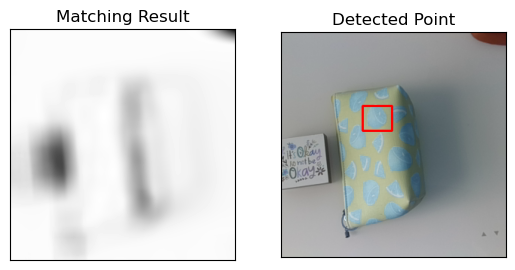

Image: rgb_image_43.png, Normalized Correlation Value: 0.925380527973175, Match Location: (130, 96)


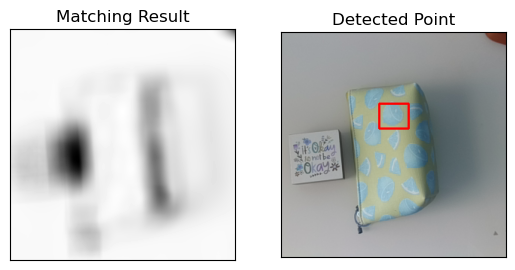

In [4]:
create_video_frames_folder('norm_results')

def find_matches(image, template):
    res = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Min location gives the top-left corner of the rectangle, where we found the lowest difference
    top_left = max_loc
    return min_val, top_left, res

def main():
    selected_region = cv2.imread("roi.png")
    selected_region = cv2.cvtColor(selected_region, cv2.COLOR_BGR2GRAY)

    frames_dir = os.path.join(VIDEO_FRAMES_FOLDER, 'frames')
    all_frames = os.listdir(frames_dir)
    norm_results_dir = os.path.join(VIDEO_FRAMES_FOLDER, 'norm_results')
    
    # Randomly picking 10 images
    random_images = random.sample(all_frames, 10)

    # Calculating Normalized Correlation
    for image_name in random_images:
        image_path = os.path.join(frames_dir, image_name)
        image = cv2.imread(image_path)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        norm_corr_value, top_left, res = find_matches(image_gray, selected_region)
        
        print(f"Image: {image_name}, Normalized Correlation Value: {norm_corr_value}, Match Location: {top_left}")
        h, w = selected_region.shape[:2]
        bottom_right = (top_left[0] + w, top_left[1] + h)
        pm = cv2.rectangle(image, top_left, bottom_right, 255, 2)

        cv2.imshow("Pattern Match", pm) 
        cv2.waitKey(1000)
        
        cv2.imwrite(norm_results_dir+"/out_"+image_name, pm)
        cv2.destroyAllWindows()  
        # Plotting the results
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(image,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
         
        plt.show()

if __name__ == "__main__":
    main()

